In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config, DataAdapter
from toolbox_continu_inzicht.fragility_curves import (
    ChangeCrestHeightFragilityCurveOvertopping,
    FragilityCurvesOvertopping,
    ShiftFragilityCurveOvertopping,
)

In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "demo_fragility_multiple_curves_overtopping_db.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

```yaml
GlobalVariables:
    rootdir: "data_sets"
    moments: [-24,0,24,48]

    FragilityCurvesOvertopping:
        gh_onz_mu: 0.96 # default waarde

DataAdapter:
    slopes:
        type: ci_postgresql_slopes
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"

    profiles:
        type: ci_postgresql_profiles
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    
    bedlevel:
        type: ci_postgresql_bedlevelfetch
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    
    fragility_curves:
        type: ci_postgresql_fragilitycurves_table
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"

    read_fc:
        type: ci_postgresql_fragilitycurves_table
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"

```

In [3]:
fragility_curves_overtopping = FragilityCurvesOvertopping(data_adapter=data_adapter)
fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel"],
    output="fragility_curves",
)

In [4]:
df = fragility_curves_overtopping.df_out
df = df[df["section_id"] == 27]
df

,waterlevels,failure_probability,section_id,failuremechanismid
0,9.95,0.000000,27,2
1,10.05,0.000000,27,2
2,10.15,0.000000,27,2
3,10.25,0.000000,27,2
4,10.35,0.000000,27,2
...,...,...,...,...
76,14.75,0.995326,27,2
77,14.80,0.996421,27,2
78,14.85,0.997242,27,2
79,14.90,0.997862,27,2


In [5]:
ids = fragility_curves_overtopping.df_out.section_id.unique()
df = fragility_curves_overtopping.df_out.set_index("waterlevels")
df = df[df["section_id"] == 27]

In [6]:
df

,failure_probability,section_id,failuremechanismid
waterlevels,,,
9.95,0.000000,27,2
10.05,0.000000,27,2
10.15,0.000000,27,2
10.25,0.000000,27,2
10.35,0.000000,27,2
...,...,...,...
14.75,0.995326,27,2
14.80,0.996421,27,2
14.85,0.997242,27,2


In [7]:
import matplotlib.pyplot as plt

In [8]:
shift_fragility_curves_overtopping = FragilityCurvesOvertopping(
    data_adapter=data_adapter
)
shift_fragility_curves_overtopping.fragility_curve_function = (
    ShiftFragilityCurveOvertopping
)
shift_fragility_curves_overtopping.measure_id = 1
shift_fragility_curves_overtopping.effect = 0.5
shift_fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel"],
    output="fragility_curves",
)

In [9]:
df_shift = shift_fragility_curves_overtopping.df_out.set_index("waterlevels")
df_shift = df_shift[df_shift["section_id"] == 27]

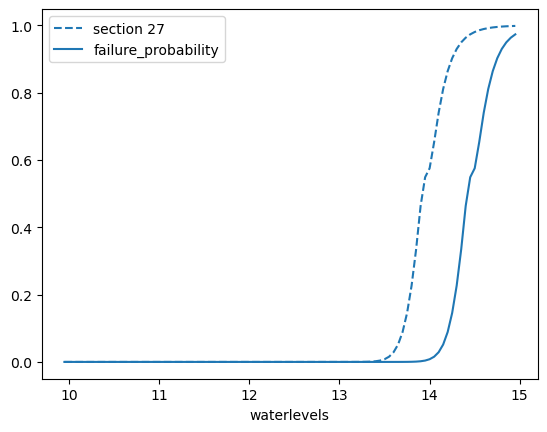

In [10]:
fig, ax = plt.subplots(1, 1)
id = 27
df[df["section_id"] == id]["failure_probability"].plot(
    color="C0", ls="--", label=f"section {id}", ax=ax
)
df_shift[df_shift["section_id"] == id]["failure_probability"].plot(color="C0", ax=ax)
ax.legend()

In [11]:
change_crest_fragility_curves_overtopping = FragilityCurvesOvertopping(
    data_adapter=data_adapter
)
change_crest_fragility_curves_overtopping.fragility_curve_function = (
    ChangeCrestHeightFragilityCurveOvertopping
)
shift_fragility_curves_overtopping.measure_id = 2
change_crest_fragility_curves_overtopping.effect = 0.5
change_crest_fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel"],
    output="fragility_curves",
)

In [12]:
df_change_crest = change_crest_fragility_curves_overtopping.df_out.set_index(
    "waterlevels"
)
df_change_crest = df_change_crest[df_change_crest["section_id"] == 27]

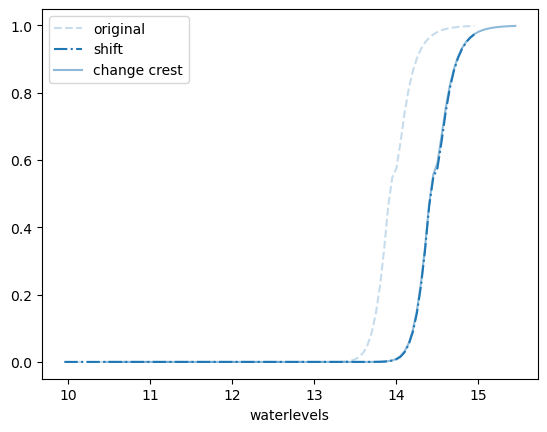

In [13]:
fig, ax = plt.subplots(1, 1)
id = 27
df[df["section_id"] == id]["failure_probability"].plot(
    ls="--", label=f"section {id}", ax=ax, alpha=0.25, color="C0"
)
df_shift[df_shift["section_id"] == id]["failure_probability"].plot(
    ax=ax, ls="-.", color="C0"
)
df_change_crest[df_change_crest["section_id"] == id]["failure_probability"].plot(
    ax=ax, alpha=0.5, color="C0"
)
ax.legend(labels=["original", "shift", "change crest"])